## Insider Trading

Something is not exactely right, you are going to have to go through the data again.

You can repeat the same analysis as you performed in institutional. (with plots) 
Also PCA could be interesting here, because so many features, not sure what is what.

The best I can do here is play with great-tables and other tools to come up with some cool looking tables/plots. Nice.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sovai as sov

sov.basic_auth("your_email@example.com", "your_password")

True

#### Processed Dataset

In [46]:
df_insider = sov.data("insider/trading", purge_cache=True)

In [50]:
datemax = df_insider.reset_index()["date"].max()


In [54]:
df_insider.query("date == @datemax").sort_values("sale_to_purchase_ratio")

,,market_impact,market_impact_percentage,percentage_shares,transaction_value,transaction_shares,days_to_file,row_number,cumulative_market_impact,relative_transaction_size,holding_period,sale_to_purchase_ratio,holding_period_pert,sale_to_purchase_ratio_pert,derivative_nonderivative_value_abs_ratio,long_term_alignment_ratio_relativesize_abs_ratio,relative_transaction_size_pert,derivative_nonderivative_impact_abs_ratio,tenpercent_nintypercent_impactperc_net_ratio,none_to_manager_shares_net_ratio,tenpercent_nintypercent_percshares_abs_ratio,direct_indirect_value_net_ratio_pert,direct_indirect_insiderscore_abs_ratio,director_officer_impactperc_net_ratio,director_officer_shares_net_ratio,director_officer_occurrences_abs_ratio,both_to_all_value_net_ratio,both_to_all_percshares_abs_ratio,none_to_manager_percshares_abs_ratio,sale_purchase_ratio_impactperc_abs_ratio_pert,sale_purchase_ratio_insiderscore_abs_ratio,willing_acquisitions_ratio_occurrences_abs_ratio,liquidity_situation_ratio_impact_abs_ratio,liquidity_situation_ratio_percshares_abs_ratio,sale_press_impactperc_director_to_officer_net_ratio_pert,sale_press_shares_director_to_officer_net_ratio_pert,sale_press_impactperc_director_to_officer_abs_ratio_pert,sale_press_value_director_to_officer_abs_ratio,sale_press_impact_ten_ninety_net_ratio,sale_press_percshares_ten_ninety_net_ratio,sale_press_impact_ten_ninety_abs_ratio,sale_press_insiderscore_ten_ninety_abs_ratio,sale_press_impact_direct_to_indirect_net_ratio,sale_press_percshares_direct_to_indirect_net_ratio_pert,sale_press_impactperc_direct_to_indirect_abs_ratio_pert,sale_press_relativesize_direct_to_indirect_abs_ratio,row_number_pert,derivative_nonderivative_value_net_ratio_pert,derivative_nonderivative_occurrences_abs_ratio_pert,tenpercent_nintypercent_impact_net_ratio_pert,tenpercent_nintypercent_percshares_net_ratio_pert,tenpercent_nintypercent_value_net_ratio_pert,tenpercent_nintypercent_percshares_abs_ratio_pert,direct_indirect_percshares_abs_ratio_pert,director_officer_impact_net_ratio_pert,director_officer_percshares_abs_ratio_pert,both_to_all_impact_net_ratio_pert,both_to_all_percshares_abs_ratio_pert,none_to_manager_percshares_abs_ratio_pert,sale_purchase_ratio_value_abs_ratio_pert,willing_acquisitions_ratio_occurrences_abs_ratio_pert,long_term_alignment_ratio_occurrences_abs_ratio_pert,liquidity_situation_ratio_value_abs_ratio_pert,sale_press_relativesize_director_to_officer_abs_ratio_pert,sale_press_value_ten_ninety_net_ratio_pert,sale_press_impact_ten_ninety_abs_ratio_pert,sale_press_occurrences_ten_ninety_abs_ratio_pert,sale_press_impact_direct_to_indirect_net_ratio_pert,sale_press_occurrences_direct_to_indirect_abs_ratio_pert,flow_prediction,positive_flow_score
ticker,date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENVX,2024-03-22,0.541,0.880,0.632,0.684,0.729,0.451,0.331,0.887,0.180,0.719,0.002,0.200,0.957,0.008,0.008,0.564,0.008,0.211,0.361,0.955,0.910,0.308,0.248,0.113,0.444,0.391,0.203,0.008,0.009,0.902,0.707,0.008,0.797,0.331,0.152,0.013,0.008,0.992,0.639,0.008,0.684,0.391,0.752,0.114,0.008,0.083,0.549,0.730,0.398,0.932,0.917,0.500,0.947,0.379,0.341,0.053,0.050,0.008,0.984,0.485,0.004,0.842,0.003,0.068,0.008,0.985,0.150,0.143,0.384,0.516
ENTX,2024-03-22,0.201,0.667,0.977,0.256,0.878,0.172,0.106,0.127,0.800,0.344,0.002,0.962,0.003,0.948,0.930,0.120,0.941,0.251,0.131,0.002,0.916,0.814,0.676,0.656,0.894,0.400,0.672,0.002,0.003,0.002,0.903,0.002,0.946,0.266,0.345,0.126,0.439,0.437,0.353,0.002,0.002,0.495,0.228,0.007,0.819,0.238,0.276,0.038,0.827,0.651,0.822,0.183,0.986,0.954,0.933,0.857,0.183,0.247,0.002,0.918,0.786,0.282,0.358,0.105,0.008,0.004,0.180,0.134,0.238,0.591
EFOI,2024-03-22,0.748,0.975,0.979,0.452,0.940,0.771,0.113,0.969,0.496,0.338,0.002,0.965,0.003,0.530,0.692,0.816,0.628,0.900,0.110,0.863,0.106,0.156,0.757,0.798,0.528,0.119,0.002,0.002,0.003,0.002,0.002,0.002,0.002,0.243,0.341,0.010,0.511,0.495,0.630,0.815,0.784,0.461,0.214,0.108,0.661,0.053,0.207,0.327,0.888,0.228,0.95

In [49]:
corr["flow_prediction"].sort_values().tail(15)

sale_press_percshares_direct_to_indirect_net_ratio_pert      0.121
sale_press_shares_director_to_officer_net_ratio_pert         0.147
sale_purchase_ratio_impactperc_abs_ratio_pert                0.151
relative_transaction_size                                    0.154
market_impact                                                0.161
sale_purchase_ratio_insiderscore_abs_ratio                   0.184
liquidity_situation_ratio_value_abs_ratio_pert               0.208
holding_period                                               0.209
sale_press_value_director_to_officer_abs_ratio               0.227
sale_press_relativesize_director_to_officer_abs_ratio_pert   0.227
none_to_manager_shares_net_ratio                             0.240
days_to_file                                                 0.257
sale_to_purchase_ratio                                       0.335
row_number                                                   0.632
flow_prediction                                              1

In [ ]:
## another unsupervised feature selection method

## The best unsupervised feature selection method is those that combine linear and non linear unsupervised learning.
# Principal Feature Analysis (PFA): An extension of PCA, PFA identifies clusters in the correlation matrix of the features and then selects the most representative feature from each cluster, reducing redundancy.
# importing everything we might need and more:
from sklearn import decomposition
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler


class PFA(object):
    def __init__(self, diff_n_features = 2, q=None, explained_var = 0.95):
        self.q = q
        self.diff_n_features = diff_n_features
        self.explained_var = explained_var

    def fit(self, X):
        sc = StandardScaler()
        X = sc.fit_transform(X)

        pca = PCA().fit(X)

        if not self.q:
            explained_variance = pca.explained_variance_ratio_
            cumulative_expl_var = [sum(explained_variance[:i+1]) for i in range(len(explained_variance))]
            for i,j in enumerate(cumulative_expl_var):
                if j >= self.explained_var:
                    q = i
                    break

        A_q = pca.components_.T[:,:q]

        clusternumber = min([q + self.diff_n_features, X.shape[1]])

        kmeans = KMeans(n_clusters= clusternumber).fit(A_q)
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_

        dists = defaultdict(list)
        for i, c in enumerate(clusters):
            dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
            dists[c].append((i, dist))

        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
        self.features_ = X[:, self.indices_]

    def fit_transform(self,X):
        sc = StandardScaler()
        X = sc.fit_transform(X)

        pca = PCA().fit(X)

        if not self.q:
            explained_variance = pca.explained_variance_ratio_
            cumulative_expl_var = [sum(explained_variance[:i+1]) for i in range(len(explained_variance))]
            for i,j in enumerate(cumulative_expl_var):
                if j >= self.explained_var:
                    q = i
                    break

        A_q = pca.components_.T[:,:q]

        clusternumber = min([q + self.diff_n_features, X.shape[1]])

        kmeans = KMeans(n_clusters= clusternumber).fit(A_q)
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_

        dists = defaultdict(list)
        for i, c in enumerate(clusters):
            dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
            dists[c].append((i, dist))

        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
        self.features_ = X[:, self.indices_]

        return X[:, self.indices_]

    def transform(self, X):
        return X[:, self.indices_]

# Testing

# df_test = df_accounting
pfa = PFA(diff_n_features=-4, explained_var= 0.75)
pfa.fit_transform(df_insider)

featurekeys = [df_insider.keys().tolist()[i] for i in pfa.indices_]
featurekeys ## I think it picked up a really good selection of features.

def update_feature_keys(featurekeys, items_to_add):
    # Iterate through the items in reverse order to maintain their order when adding to the front
    for item in reversed(items_to_add):
        # Remove the item if it's already in the list
        if item in featurekeys:
            featurekeys.remove(item)
        # Add the item to the front of the list
        featurekeys.insert(0, item)
    return featurekeys

# Example usage
items_to_add = ['market_impact', 'market_impact_percentage', 'percentage_shares', 'transaction_value', 'transaction_shares', 'days_to_file', 'row_number', 'cumulative_market_impact', 'relative_transaction_size', 'holding_period', 'sale_to_purchase_ratio', 'holding_period_pert', 'sale_to_purchase_ratio_pert', 'future_return_quarterly', 'flow_prediction']

updated_featurekeys = update_feature_keys(featurekeys, items_to_add)


In [23]:
updated_featurekeys

['market_impact',
 'market_impact_percentage',
 'percentage_shares',
 'transaction_value',
 'transaction_shares',
 'days_to_file',
 'row_number',
 'cumulative_market_impact',
 'relative_transaction_size',
 'holding_period',
 'sale_to_purchase_ratio',
 'holding_period_pert',
 'sale_to_purchase_ratio_pert',
 'future_return_quarterly',
 'flow_prediction',
 'market_impact_percentage_pert',
 'willing_acquisitions_ratio_percshares_abs_ratio',
 'sale_purchase_ratio_impact_abs_ratio',
 'long_term_alignment_ratio_relativesize_abs_ratio',
 'relative_transaction_size_pert',
 'derivative_nonderivative_impactperc_abs_ratio',
 'sale_purchase_ratio_percshares_abs_ratio',
 'derivative_nonderivative_percshares_abs_ratio',
 'tenpercent_nintypercent_impactperc_net_ratio',
 'tenpercent_nintypercent_shares_net_ratio',
 'tenpercent_nintypercent_occurrences_abs_ratio',
 'direct_indirect_impact_net_ratio_pert',
 'direct_indirect_value_net_ratio_pert',
 'direct_indirect_insiderscore_abs_ratio',
 'director_offi

In [24]:
updated_featurekeys

['market_impact',
 'market_impact_percentage',
 'percentage_shares',
 'transaction_value',
 'transaction_shares',
 'days_to_file',
 'row_number',
 'cumulative_market_impact',
 'relative_transaction_size',
 'holding_period',
 'sale_to_purchase_ratio',
 'holding_period_pert',
 'sale_to_purchase_ratio_pert',
 'future_return_quarterly',
 'flow_prediction',
 'market_impact_percentage_pert',
 'willing_acquisitions_ratio_percshares_abs_ratio',
 'sale_purchase_ratio_impact_abs_ratio',
 'long_term_alignment_ratio_relativesize_abs_ratio',
 'relative_transaction_size_pert',
 'derivative_nonderivative_impactperc_abs_ratio',
 'sale_purchase_ratio_percshares_abs_ratio',
 'derivative_nonderivative_percshares_abs_ratio',
 'tenpercent_nintypercent_impactperc_net_ratio',
 'tenpercent_nintypercent_shares_net_ratio',
 'tenpercent_nintypercent_occurrences_abs_ratio',
 'direct_indirect_impact_net_ratio_pert',
 'direct_indirect_value_net_ratio_pert',
 'direct_indirect_insiderscore_abs_ratio',
 'director_offi

In [22]:
len(updated_featurekeys)

67

In [ ]:
market_impact 	market_impact_percentage 	percentage_shares 	transaction_value 	transaction_shares 	days_to_file 	row_number 	cumulative_market_impact 	relative_transaction_size  	holding_period 	sale_to_purchase_ratio 	holding_period_pert 	sale_to_purchase_ratio_pert 	future_return_quarterly 	flow_prediction

In [16]:
df_insider.head()

market_impact  market_impact_percentage  percentage_shares  \
ticker date                                                                     
WLKR   2014-09-12       0.557184                  0.675877           0.876742   
       2014-09-19       0.539347                  0.494722           0.848129   
       2014-09-26       0.537152                  0.494966           0.845877   
       2014-10-03       0.537706                  0.496050           0.843907   
       2014-10-10       0.537688                  0.495334           0.845657   

                   transaction_value  transaction_shares  days_to_file  \
ticker date                                                              
WLKR   2014-09-12           0.566795            0.926958      0.768140   
       2014-09-19           0.548704            0.923225      0.765835   
       2014-09-26           0.545781            0.922579      0.766539   
       2014-10-03           0.544170            0.921714      0.766100   
       2014-10-10           0.545106            0.921273      0.763819   

                   row_number  cumulative_market_impact  \
ticker date                                               
WLKR   2014-09-12    0.080250                  0.302499   
       2014-09-19    0.065979                  0.301583   
       2014-09-26    0.066395                  0.301055   
       2014-10-03    0.066076                  0.300694   
       2014-10-10    0.066523                  0.301029   

                   relative_transaction_size  insider_score  \
ticker date                                                   
WLKR   2014-09-12                   0.279508       0.569153   
       2014-09-19                   0.279508       0.569153   
       2014-09-26                   0.279508       0.569153   
       2014-10-03                   0.279508       0.569153   
       2014-10-10                   0.279508       0.569153   

                   derivative_nonderivative_impact_net_ratio  \
ticker date                                                    
WLKR   2014-09-12                                   0.670272   
       2014-09-19                                   0.956480   
       2014-09-26                                   0.957713   
       2014-10-03                                   0.957534   
       2014-10-10                                   0.957814   

                   derivative_nonderivative_impactperc_net_ratio  \
ticker date                                                        
WLKR   2014-09-12                                       0.664504   
       2014-09-19                                       0.978120   
       2014-09-26                                       0.978616   
       2014-10-03                                       0.978647   
       2014-10-10                                       0.979386   

                   derivative_nonderivative_percshares_net_ratio  \
ticker date                                                        
WLKR   2014-09-12                                       0.585917   
       2014-09-19                                       0.660495   
       2014-09-26                                       0.659779   
       2014-10-03                                       0.660269   
       2014-10-10                                       0.662033   

                   derivative_nonderivative_value_net_ratio  \
ticker date                                                   
WLKR   2014-09-12                                  0.523913   
       2014-09-19                                  0.586199   
       2014-09-26                                  0.588179   
       2014-10-03                                  0.590931   
       2014-10-10                                  0.590364   

                   derivative_nonderivative_shares_net_ratio  \
ticker date                                                    
WLKR   2014-09-12                                   0.641432   
       2014-09-19                      

In [4]:
df_insider.info(verbose=True)

<class 'sovai.utils.pandas_extensions.CustomDataFrame'>
MultiIndex: 100000 entries, ('WLKR', Timestamp('2014-09-12 00:00:00')) to ('ZZ', Timestamp('2013-03-15 00:00:00'))
Data columns (total 348 columns):
 #    Column                                                      Dtype  
---   ------                                                      -----  
 0    market_impact                                               float32
 1    market_impact_percentage                                    float32
 2    percentage_shares                                           float32
 3    transaction_value                                           float32
 4    transaction_shares                                          float32
 5    days_to_file                                                float32
 6    row_number                                                  float32
 7    cumulative_market_impact                                    float32
 8    relative_transaction_size                        

In [2]:
df_insider = sov.data("insider/trading", start_date="2017-03-30", tickers=["MSFT","TSLA"], purge_cache=True)

/insider/trading
Requesting URL: https://fastapi-sovai-y7o724zyfq-uc.a.run.app/insider/trading with params: {'tickers': 'MSFT,TSLA', 'from_date': '2017-03-30T00:00:00'}
An error occurred: 500 Server Error: Internal Server Error for url: https://fastapi-sovai-y7o724zyfq-uc.a.run.app/insider/trading?tickers=MSFT%2CTSLA&from_date=2017-03-30T00%3A00%3A00


In [4]:
df_insider.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [16]:
df_insider = sov.data("insider/trading")

/insider/trading
Requesting URL: https://fastapi-sovai-y7o724zyfq-uc.a.run.app/insider/trading with params: None
Response Status: 200
Response Content-Type: application/json
tickers is None
None
tickers is: 
All ticker Initialized
https://s3.wasabisys.com/sovai-insider/dataframes/df_insider.park?AWSAccessKeyId=KI07G4DK9XP5EC0NH1VU&Signature=L3FGBRhlVJs97C7LrgU%2BStRBqn0%3D&Expires=1704837914  (download link)


In [17]:
df_insider.head()

market_impact  market_impact_percentage  percentage_shares  \
ticker date                                                                     
WLKR   2014-09-12       0.557184                  0.675877           0.876742   
       2014-09-19       0.539347                  0.494722           0.848129   
       2014-09-26       0.537152                  0.494966           0.845877   
       2014-10-03       0.537706                  0.496050           0.843907   
       2014-10-10       0.537688                  0.495334           0.845657   

                   transaction_value  transaction_shares  days_to_file  \
ticker date                                                              
WLKR   2014-09-12           0.566795            0.926958      0.768140   
       2014-09-19           0.548704            0.923225      0.765835   
       2014-09-26           0.545781            0.922579      0.766539   
       2014-10-03           0.544170            0.921714      0.766100   
       2014-10-10           0.545106            0.921273      0.763819   

                   row_number  cumulative_market_impact  \
ticker date                                               
WLKR   2014-09-12    0.080250                  0.302499   
       2014-09-19    0.065979                  0.301583   
       2014-09-26    0.066395                  0.301055   
       2014-10-03    0.066076                  0.300694   
       2014-10-10    0.066523                  0.301029   

                   relative_transaction_size  insider_score  \
ticker date                                                   
WLKR   2014-09-12                   0.279508       0.569153   
       2014-09-19                   0.279508       0.569153   
       2014-09-26                   0.279508       0.569153   
       2014-10-03                   0.279508       0.569153   
       2014-10-10                   0.279508       0.569153   

                   derivative_nonderivative_impact_net_ratio  \
ticker date                                                    
WLKR   2014-09-12                                   0.670272   
       2014-09-19                                   0.956480   
       2014-09-26                                   0.957713   
       2014-10-03                                   0.957534   
       2014-10-10                                   0.957814   

                   derivative_nonderivative_impactperc_net_ratio  \
ticker date                                                        
WLKR   2014-09-12                                       0.664504   
       2014-09-19                                       0.978120   
       2014-09-26                                       0.978616   
       2014-10-03                                       0.978647   
       2014-10-10                                       0.979386   

                   derivative_nonderivative_percshares_net_ratio  \
ticker date                                                        
WLKR   2014-09-12                                       0.585917   
       2014-09-19                                       0.660495   
       2014-09-26                                       0.659779   
       2014-10-03                                       0.660269   
       2014-10-10                                       0.662033   

                   derivative_nonderivative_value_net_ratio  \
ticker date                                                   
WLKR   2014-09-12                                  0.523913   
       2014-09-19                                  0.586199   
       2014-09-26                                  0.588179   
       2014-10-03                                  0.590931   
       2014-10-10                                  0.590364   

                   derivative_nonderivative_shares_net_ratio  \
ticker date                                                    
WLKR   2014-09-12                                   0.641432   
       2014-09-19                      

In [23]:
df_news = sov.data("news/daily")

/news/daily
Requesting URL: https://fastapi-sovai-y7o724zyfq-uc.a.run.app/news/daily with params: None
Cache entry purged.
Response Status: 200
Response Content-Type: application/json
tickers is None
None
tickers is: 
All ticker Initialized
https://s3.wasabisys.com/sovai-news/frames/daily2_filled.park?AWSAccessKeyId=KI07G4DK9XP5EC0NH1VU&Signature=wIlna6w5CzpKwO0gI9xGlhNtYb0%3D&Expires=1704830237  (download link)


In [24]:
df_news.head()

match_quality  within_article  relevance  magnitude  \
ticker   date                                                              
0077943D 2017-01-01       0.499972        0.436957   0.500000   0.499888   
         2017-01-02       0.509647        0.411156   0.507768   0.503085   
         2017-01-03       0.515957        0.389113   0.508862   0.512648   
         2017-01-04       0.899854        0.374699   0.238179   0.783499   
         2017-01-05       0.896293        0.366650   0.266420   0.782573   

                     sentiment  article_count  associated_people  \
ticker   date                                                      
0077943D 2017-01-01   0.500028       0.498233           0.500308   
         2017-01-02   0.496999       0.522744           0.505356   
         2017-01-03   0.498962       0.530568           0.510545   
         2017-01-04   0.241012       0.405183           0.778114   
         2017-01-05   0.239469       0.453419           0.780274   

                     associated_companies      tone  positive  negative  \
ticker   date                                                             
0077943D 2017-01-01              0.500365  0.500028  0.499860  0.500028   
         2017-01-02              0.503758  0.497139  0.498822  0.504824   
         2017-01-03              0.515452  0.498065  0.505132  0.502580   
         2017-01-04              0.807981  0.262129  0.241601  0.688205   
         2017-01-05              0.803747  0.264401  0.248163  0.682259   

                     polarity  activeness  pronouns  word_count  fill_values  
ticker   date                                                                 
0077943D 2017-01-01  0.500028    0.500337  0.500000    0.500028     0.286584  
         2017-01-02  0.501627    0.501655  0.500701    0.502692     0.286584  
         2017-01-03  0.501767    0.499411  0.505525    0.513545     0.286584  
         2017-01-04  0.311010    0.243059  0.290033    0.868332     0.286584  
         2017-01-05  0.336699    0.261484  0.302316    0.868304     0.286584

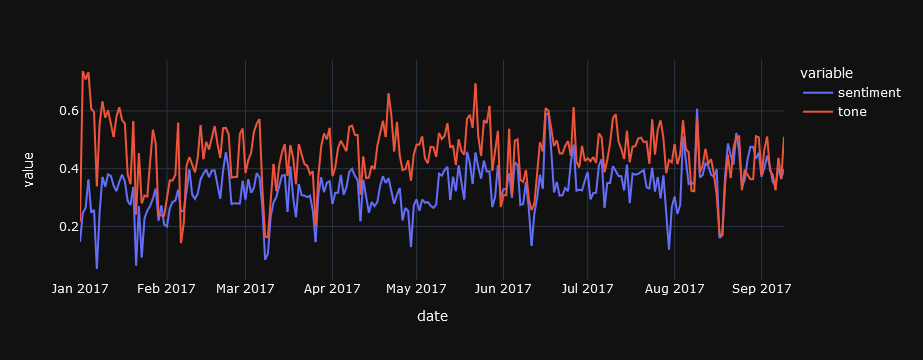

In [29]:
df_news.query("ticker == 'AAPL'").reset_index().set_index("date")[["sentiment","tone"]].plot()

In [30]:
df_news_sent = sov.data("news/sentiment")

/news/sentiment
Requesting URL: https://fastapi-sovai-y7o724zyfq-uc.a.run.app/news/sentiment with params: None
Response Status: 200
Response Content-Type: application/json
tickers is None
None
tickers is: 
All ticker Initialized
https://s3.wasabisys.com/sovai-news/frames/sentiment.park?AWSAccessKeyId=KI07G4DK9XP5EC0NH1VU&Signature=wXN9erOIL8v2tqW8ifw3MA5Nc0M%3D&Expires=1704830470  (download link)


In [37]:
df_news_sent[["MSFT","TSLA", "AMZN", "AAPL", "FB", "GOOG"]].corr()

ticker,MSFT,TSLA,AMZN,AAPL,FB,GOOG
ticker,,,,,,
MSFT,1.000000,0.224509,0.051286,0.309202,-0.085306,0.277285
TSLA,0.224509,1.000000,0.555163,0.520831,-0.241285,0.283434
AMZN,0.051286,0.555163,1.000000,0.494081,-0.053698,0.043217
AAPL,0.309202,0.520831,0.494081,1.000000,-0.048227,0.320089
FB,-0.085306,-0.241285,-0.053698,-0.048227,1.000000,-0.088186
GOOG,0.277285,0.283434,0.043217,0.320089,-0.088186,1.000000


In [19]:
df_institute = sov.data("institutional/trading")

/institutional/trading
Requesting URL: https://fastapi-sovai-y7o724zyfq-uc.a.run.app/institutional/trading with params: None
Response Status: 200
Response Content-Type: application/json
tickers is None
None
tickers is: 
All ticker Initialized
https://s3.wasabisys.com/sovai-institutional/dataframes/machine_learning_data.parq?AWSAccessKeyId=KI07G4DK9XP5EC0NH1VU&Signature=Bn9x4xX3Gy9IIDdpNRiMAM7tYvk%3D&Expires=1704317624  (download link)


In [20]:
df_institute.head()

std_percentoftotal_fund_median  \
ticker date                                         
A      2016-12-31                        0.210206   
       2017-03-31                        0.214739   
       2017-06-30                        0.209449   
       2017-09-30                        0.214397   
       2017-12-31                        0.231051   

                   std_put_call_ratio_fund_median  \
ticker date                                         
A      2016-12-31                        0.437844   
       2017-03-31                        0.426307   
       2017-06-30                        0.422947   
       2017-09-30                        0.420883   
       2017-12-31                        0.427083   

                   std_derivative_ratio_fund_median  \
ticker date                                           
A      2016-12-31                          0.435894   
       2017-03-31                          0.422685   
       2017-06-30                          0.420022   
       2017-09-30                          0.416314   
       2017-12-31                          0.421099   

                   derivative_ratio_fund_median  put_call_ratio_fund_median  \
ticker date                                                                   
A      2016-12-31                      0.442087                    0.495298   
       2017-03-31                      0.460380                    0.496717   
       2017-06-30                      0.449831                    0.498313   
       2017-09-30                      0.456987                    0.498663   
       2017-12-31                      0.453568                    0.498227   

                   fund_ratio_fund_median  debt_ratio_fund_median  \
ticker date                                                         
A      2016-12-31                0.512500                0.184748   
       2017-03-31                0.507245                0.210437   
       2017-06-30                0.531159                0.244544   
       2017-09-30                0.539782                0.304435   
       2017-12-31                0.561613                0.340204   

                   preferred_ratio_fund_median  totalvalue_median  \
ticker date                                                         
A      2016-12-31                     0.184404           0.229243   
       2017-03-31                     0.079579           0.225040   
       2017-06-30                     0.090101           0.222835   
       2017-09-30                     0.133720           0.223758   
       2017-12-31                     0.276596           0.246786   

                   percentoftotal_median  shrholdings_growth_median  \
ticker date                                                           
A      2016-12-31               0.234977                   0.380390   
       2017-03-31               0.231379                   0.472719   
       2017-06-30               0.221822                   0.479190   
       2017-09-30               0.225875                   0.514598   
       2017-12-31               0.254654                   0.484264   

                   totalvalue_growth_median  \
ticker date                                   
A      2016-12-31                  0.531766   
       2017-03-31                  0.447136   
       2017-06-30                  0.367492   
       2017-09-30                  0.188099   
       2017-12-31                  0.374557   

                   put_call_ratio_fund_growth_median  \
ticker date                                            
A      2016-12-31                           0.496560   
       2017-03-31                           0.496151   
       2017-06-30                           0.491451   
       2017-09-30                           0.490528   
       2017-12-31                           0.499335   

                   derivative_ratio_fund_growth_median  \
ticker date                                              
A      2016-12-31             

In [ ]:
service_account_info = {}